## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20,07/01/2010,06/30/2013


In [4]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB


In [16]:
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df['Number of Discharges']

0         242
1         247
2         586
3         965
4         149
5         141
6         390
7         178
8          98
9         256
10        121
11        108
12        780
13        216
14       1458
15        238
16        154
17        117
18        322
19         98
20        493
21        332
22        136
23        179
24         97
25        536
26        268
27       1658
28        260
29         57
         ... 
15679       0
15682       0
15697       0
15703       0
15765       0
15806       0
15843       0
15907       0
15927       0
15987       0
16086       0
16129       0
16160       0
16201       0
16213       0
16234       0
16317       0
16339       0
16350       0
16409       0
16429       0
16518       0
16541       0
16553       0
16565       0
16661       0
16664       0
16812       0
16818       0
16857       0
Name: Number of Discharges, dtype: object

In [21]:
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df.loc[:, 'Number of Discharges']

0         242
1         247
2         586
3         965
4         149
5         141
6         390
7         178
8          98
9         256
10        121
11        108
12        780
13        216
14       1458
15        238
16        154
17        117
18        322
19         98
20        493
21        332
22        136
23        179
24         97
25        536
26        268
27       1658
28        260
29         57
         ... 
15679       0
15682       0
15697       0
15703       0
15765       0
15806       0
15843       0
15907       0
15927       0
15987       0
16086       0
16129       0
16160       0
16201       0
16213       0
16234       0
16317       0
16339       0
16350       0
16409       0
16429       0
16518       0
16541       0
16553       0
16565       0
16661       0
16664       0
16812       0
16818       0
16857       0
Name: Number of Discharges, dtype: int64

In [24]:
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16661,MARLBORO PARK HOSPITAL,420054,SC,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16818,STAMFORD MEMORIAL HOSPITAL,450306,TX,READM-30-AMI-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16565,CITIZENS BAPTIST MEDICAL CENTER,10101,AL,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13762,P H S INDIAN HOSPITAL AT BROWNING - BLACKFEET,270074,MT,READM-30-AMI-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13812,THE NEUROMEDICAL CENTER HOSPITAL,190266,LA,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16553,KAISER FOUNDATION HOSPITAL - SOUTH SAN FRANCISCO,50070,CA,READM-30-AMI-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13845,DOCTORS HOSPITAL LLC,170194,KS,READM-30-COPD-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16664,HERITAGE MEDICAL CENTER,440137,TN,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13876,ROSELAND COMMUNITY HOSPITAL,140068,IL,READM-30-HIP-KNEE-HRRP,0,7,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [61]:
clean_hospital_read_df['Number of Discharges'][81:]

1832       25
1699       27
1774       28
1853       29
1290       30
1602       31
2048       33
2441       34
2512       34
2825       34
2670       35
2378       35
2944       35
5125       35
3828       35
3312       35
1238       36
1395       36
3087       37
3145       37
3207       37
1471       37
1838       37
4092       37
2252       37
3406       38
2952       38
4317       38
5309       38
738        39
         ... 
7147     2042
897      2060
13326    2089
7872     2106
9444     2112
13723    2189
1605     2190
12910    2196
2758     2198
7934     2209
1352     2278
3042     2314
1448     2318
2846     2341
8249     2353
3202     2388
13730    2393
2440     2430
11545    2469
1805     2476
8818     2509
572      2565
136      2581
1698     2596
1242     2705
8126     2716
6643     2740
1892     3570
13615    3980
13666    6793
Name: Number of Discharges, dtype: int64

In [29]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]

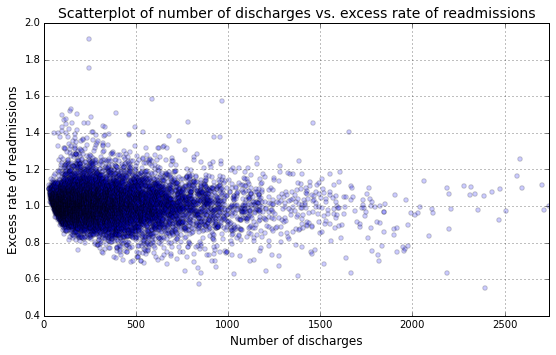

In [62]:
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

# ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
# ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])

ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)

ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****
## Preliminary analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

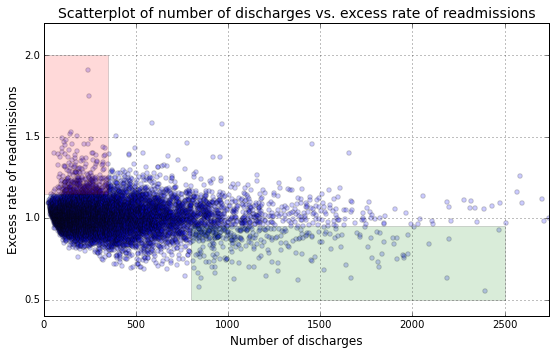

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### A. I agree with the above analysis and recommmendations. 

From the figure, we see that rate of readmissions is trending down with increasing number of discharges. Lower number of discharges, higher rate of readmission, vice versa. There is showing that there is a significant correlation between hosptial capacity and readmission rates.

### B. Hypothesis test

#####First, Setup the hypothesis test

Null Hypothesis, H0:  hosptial capacity and readmission rates are independent
Alternative Hypothesis, HA: hosptial capacity and readmission rates are not independent

We use Chi-Square test to test the correlation between hosptial capacity and readmission rates. We devide the readmission data into smaller or larger than 1. We divide the numbers of dicharges into 0~300, 301~1000, 1000~max. 

In [68]:
df = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3]
df.head()

,Number of Discharges,Excess Readmission Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


In [82]:
df.tail()

,Number of Discharges,Excess Readmission Ratio
136,2581,1.2577
1698,2596,1.0962
1242,2705,1.1148
8126,2716,0.9804
6643,2740,1.0003


********

##### Second, compute and report the observed significance value (or p-value)

In [74]:
df.count()

Number of Discharges        11494
Excess Readmission Ratio    11494
dtype: int64

In [78]:
num = [x for x in df['Number of Discharges']]
ratio = [y for y in df['Excess Readmission Ratio']]

In [88]:
# Calculate the number of each group

count_a0 = 0
count_a1 = 0
count_b0 = 0
count_b1 = 0
count_c0 = 0
count_c1 = 0

for x, y in zip(num, ratio):
    if x <= 300 and y < 1:
        count_a0 += 1
    elif x <= 300 and y > 1:
        count_a1 += 1
    elif x <= 1000 and y < 1:
        count_b0 += 1
    elif x <= 1000 and y > 1:
        count_b1 += 1
    elif x > 1000 and y < 1:
        count_c0 += 1
    elif x > 1000 and y > 1:
        count_c1 += 1

print 'count_a0 =', count_a0
print 'count_a1 =', count_a1
print 'count_b0 =', count_b0
print 'count_b1 =', count_b1
print 'count_c0 =', count_c0
print 'count_c1 =', count_c1

count_a0 = 2828
count_a1 = 3298
count_b0 = 2462
count_b1 = 2435
count_c0 = 255
count_c1 = 205


In [98]:
count_0 = count_a0 + count_b0 + count_c0
print 'count_0 =', count_0

count_a = count_a0 + count_a1
count_b = count_b0 + count_b1
count_c = count_c0 + count_c1

total = count_a + count_b + count_c

print 'count_a =', count_a
print 'count_b =', count_b
print 'count_c =', count_c

count_0 = 5545
count_a = 6126
count_b = 4897
count_c = 460


In [107]:
ex_count_a0 = count_a * count_0 / total
ex_count_b0 = count_b * count_0 / total
ex_count_c0 = count_c * count_0 / total
ex_count_a1 = count_a - count_a0
ex_count_b1 = count_b - count_b0
ex_count_c1 = count_c - count_c0

In [108]:
Square_of_X = (count_a0 - ex_count_a0) ** 2 / ex_count_a0 + (count_b0 - ex_count_b0) ** 2 / ex_count_b0 + (count_c0 - ex_count_c0) ** 2 / ex_count_c0 + (count_a1 - ex_count_a1) ** 2 / ex_count_a1 + (count_b1 - ex_count_b1) ** 2 / ex_count_b1 + (count_c1 - ex_count_c1) ** 2 / ex_count_c1

In [109]:
Square_of_X

13

In [110]:
degree_of_freedom = (2 - 1) * (3 - 1)
degree_of_freedom

2

****
##### Third, significant level is 0.01. According to Chi-square value and degree of freedom, we get:

##### The P-Value is 0.001503. The result is significant at p < 0.01.

****

##### Last, for statistical significant, it is easier to detect the difference between point estimate and null and/or correlation between two categorical variables with larger samples like in this exercise. For practical significant, statistical significance results from large samples may not results in practical significant. The reason is that even tiny different or little correlation with larger sample can results in statistical significant, even it is not practically signficant.